In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from itertools import product

In [2]:
df = pd.read_csv('singapore_trip_advisor_data_cleaned.csv', error_bad_lines=False)

In [3]:
df.head(5)

,REVIEW_INDEX,REVIEW_DATE,REVIEW_RATING,REVIEW_TITLE,REVIEW_BODY,DATE_OF_EXPERIENCE,TRIP_TYPE,REVIEW_CRAWLED_TIME,REVIEWER_NAME,HOME_COUNTRY,ATTRACTION_NAME,ATTRACTION_TYPE,ADDRESS,clean_text
0,741832336,2020-01-29 00:00:00.000,5,Fabulous,Fabulous experience and an unforgettable day o...,2020-01-01 00:00:00.000,Couples,2020-01-29 12:01:27.012,Dreinog,United Kingdom,Cloud Forest,Leisure & Recreation,18 Marina Gardens Drive | 18 Marina Gardens Dr...,fabulous experience unforgettable day singapor...
1,741819214,2020-01-29 00:00:00.000,5,Stunning,I wasnâ€™t sure what to expect but this was ab...,2020-01-01 00:00:00.000,Family,2020-01-29 11:30:13.663,3mcglynns,Australia,Cloud Forest,Leisure & Recreation,18 Marina Gardens Drive | 18 Marina Gardens Dr...,wasnatmt sure expect absolutely beautiful moth...
2,741818972,2020-01-29 00:00:00.000,3,Another Chinatown,As every major city worldwide seems to have a ...,2020-01-01 00:00:00.000,Couples,2020-01-30 11:53:44.082,MR_Travels1920,United Kingdom,Chinatown,Precinct & Street,"Crot | Trengganu, Singapore 048942, Singapore",every major city worldwide seem chinatown anot...
3,741881009,2020-01-29 00:00:00.000,4,Good lively place to visit,Busy lively place in the evening I visited. Go...,2020-01-01 00:00:00.000,Solo,2020-01-30 12:34:12.312,RaviA651,United States,Chinatown,Precinct & Street,"Crot | Trengganu, Singapore 048942, Singapore",busy lively place even visit go empty stomach ...
4,741827762,2020-01-29 00:00:00.000,5,Great experience,Fabulous location and atmosphere. We only stop...,2020-01-01 00:00:00.000,Couples,2020-01-29 23:02:07.201,Dreinog,United Kingdom,Marina Bay,Precinct & Street,"Marina Boulevard, Singapore 018980, Singapore",fabulous location atmosphere stop day return s...


In [4]:
df.shape

(103766, 14)

# Review Rating

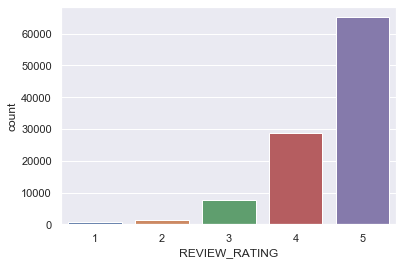

In [5]:
sns.countplot(x="REVIEW_RATING",data=df)
plt.show()

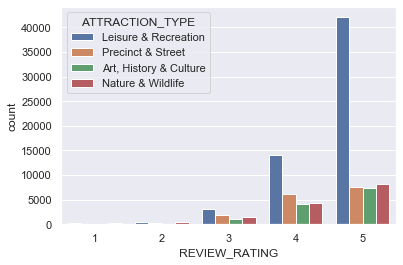

In [6]:
#plt.figure(figsize = (20,10))
sns.countplot(x="REVIEW_RATING", hue="ATTRACTION_TYPE", data=df)
plt.show()

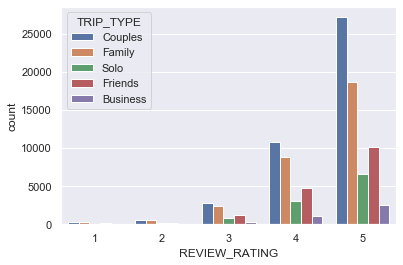

In [7]:
#plt.figure(figsize = (20,10))
sns.countplot(x="REVIEW_RATING", hue="TRIP_TYPE", data=df)
plt.show()

In [8]:
df1=df[['TRIP_TYPE','HOME_COUNTRY']].copy()
df2=df[['HOME_COUNTRY','ATTRACTION_TYPE']].copy()

# User Profile

In [9]:
df1['HOME_COUNTRY'].value_counts()[:15]

Australia               22574
United Kingdom          17793
Singapore               13160
India                   10533
United States            9929
New Zealand              2765
Indonesia                2512
Canada                   2337
Philippines              2048
Malaysia                 1970
China                    1488
Thailand                 1316
United Arab Emirates     1057
Germany                   834
South Africa              828
Name: HOME_COUNTRY, dtype: int64

In [10]:
x=df1['HOME_COUNTRY'].value_counts()[:15].index.values
my_dict={i:i for i in x}
my_dict.update({j:np.nan for j in df1['HOME_COUNTRY'].unique() if j not in x})
df1['HOME_COUNTRY1']=df1['HOME_COUNTRY'].map(my_dict)

In [11]:
df1['HOME_COUNTRY1'].isna().sum()

12622

In [12]:
df1.dropna(inplace=True)
df1.shape

(91144, 3)

In [13]:
df1[['TRIP_TYPE','HOME_COUNTRY1']].value_counts()

TRIP_TYPE  HOME_COUNTRY1       
Couples    Australia               11514
           United Kingdom          11094
Family     India                    5879
           Australia                5628
           Singapore                5617
                                   ...  
Business   Thailand                   71
           China                      67
           New Zealand                41
           United Arab Emirates       34
           South Africa               30
Length: 75, dtype: int64

In [14]:
x=df1[['TRIP_TYPE','HOME_COUNTRY1']].value_counts()
user_profile=pd.DataFrame(index=df1.TRIP_TYPE.unique(),columns=df1.HOME_COUNTRY.unique())
for i,j in product(df1.TRIP_TYPE.unique(),df1.HOME_COUNTRY.unique()):
    user_profile.loc[i,j]=x[(i,j)]
user_profile=user_profile.astype(int)


In [15]:
user_profile

,United Kingdom,Australia,United States,Thailand,India,Indonesia,Singapore,New Zealand,Germany,Philippines,Canada,United Arab Emirates,China,South Africa,Malaysia
Couples,11094,11514,4020,389,2313,516,2492,1544,331,356,1134,272,376,374,408
Family,2748,5628,1969,332,5879,1029,5617,641,136,901,412,469,502,229,867
Solo,1493,1854,1520,208,657,316,1299,256,127,255,334,144,249,95,215
Friends,1987,3111,1596,316,1164,564,3453,283,140,427,357,138,294,100,382
Business,471,467,824,71,520,87,299,41,100,109,100,34,67,30,98


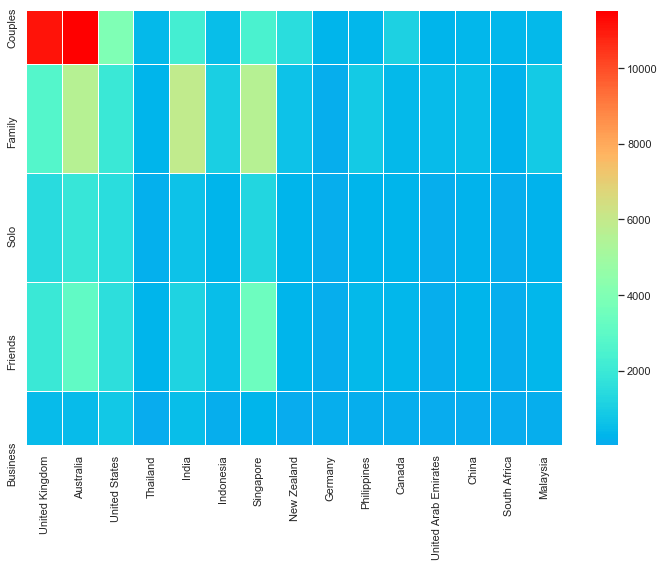

In [16]:
plt.subplots(figsize=(12,8))
#cmap = sns.cubehelix_palette(start = 2, rot = 2.5, gamma=0.8, as_cmap = True)
#sns.heatmap(user_profile,cmap=cmap)
sns.heatmap(user_profile,linewidths = 0.05,cmap='rainbow',center=4000)
plt.show()

# Attraction

In [17]:
df['ATTRACTION_NAME'].value_counts()

Gardens by the Bay                       23110
Singapore Zoo                             6403
Singapore Botanic Gardens                 6154
Cloud Forest                              6128
Marina Bay Sands Skypark                  5195
                                         ...  
Lee Kong Chian Natural History Museum       60
Kuan Yin Thong Hood Cho Temple              43
Faber Peak                                  39
Katong District                             25
Kusu Island                                 24
Name: ATTRACTION_NAME, Length: 68, dtype: int64

In [18]:
df['ATTRACTION_NAME'].value_counts()[:10]

Gardens by the Bay           23110
Singapore Zoo                 6403
Singapore Botanic Gardens     6154
Cloud Forest                  6128
Marina Bay Sands Skypark      5195
Chinatown                     5028
Singapore Flyer               4418
Orchard Road                  4368
Night Safari                  4018
National Orchid Garden        3903
Name: ATTRACTION_NAME, dtype: int64

In [19]:
df.ATTRACTION_TYPE.value_counts(normalize=True)

Leisure & Recreation      0.578301
Precinct & Street         0.153441
Nature & Wildlife         0.144479
Art, History & Culture    0.123779
Name: ATTRACTION_TYPE, dtype: float64

In [20]:
df.groupby(['ATTRACTION_TYPE','ATTRACTION_NAME'],as_index=False)['REVIEW_INDEX'].count()

,ATTRACTION_TYPE,ATTRACTION_NAME,REVIEW_INDEX
0,"Art, History & Culture",ArtScience Museum at Marina Bay Sands,577
1,"Art, History & Culture",Asian Civilisations Museum,445
2,"Art, History & Culture",Battlebox,1558
3,"Art, History & Culture",Buddha Tooth Relic Temple and Museum,1829
4,"Art, History & Culture",Chijmes,229
...,...,...,...
63,Precinct & Street,Little India,900
64,Precinct & Street,Marina Bay,2803
65,Precinct & Street,Orchard Road,4368
66,Precinct & Street,Satay Street,93


In [21]:
x=df.groupby(['ATTRACTION_TYPE','ATTRACTION_NAME'],as_index=False)['REVIEW_INDEX'].count()

In [22]:
attraction_type=x.ATTRACTION_TYPE.unique()
attraction_type

array(['Art, History & Culture', 'Leisure & Recreation',
       'Nature & Wildlife', 'Precinct & Street'], dtype=object)

In [23]:
for i in attraction_type:
    print(i)

Art, History & Culture
Leisure & Recreation
Nature & Wildlife
Precinct & Street


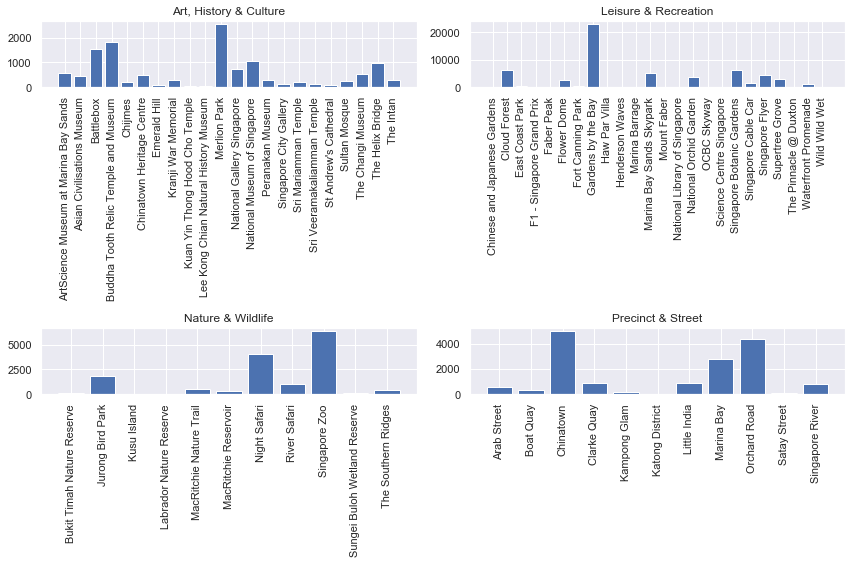

In [24]:
plt.figure(figsize=(12,8))
k=1
for i in attraction_type:
    plt.subplot(2,2,k)
    xx=x[x.ATTRACTION_TYPE==i]
    plt.bar(xx.ATTRACTION_NAME, xx.REVIEW_INDEX)
    plt.xticks(rotation=90)
    plt.title('%s'%(i))
    k+=1
plt.tight_layout()
plt.show()